#**Load Data**

In [370]:
import pandas as pd

data = pd.read_csv('/content/data_clean.csv')
data.head()

,Face_Diameter,Glass_material,Wire_material,Apparatus,Waterproof,Origin,agency,Price
0,45.4,Mineral Crystal,dây kim loại,Quartz,20,Nhật Bản,Casio,5695000
1,45.4,Mineral Crystal,dây kim loại,Quartz,20,Nhật Bản,Casio,5695000
2,45.4,Mineral Crystal,dây cao su,Quartz,20,Nhật Bản,Casio,5515000
3,45.4,Mineral Crystal,dây nhựa,Touch Solar,20,Nhật Bản,Casio,4752000
4,45.4,Mineral Crystal,dây cao su,Quartz,20,Nhật Bản,Casio,5515000


In [371]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3035 entries, 0 to 3034
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Face_Diameter   3035 non-null   float64
 1   Glass_material  3035 non-null   object 
 2   Wire_material   3035 non-null   object 
 3   Apparatus       3035 non-null   object 
 4   Waterproof      3035 non-null   int64  
 5   Origin          3035 non-null   object 
 6   agency          3035 non-null   object 
 7   Price           3035 non-null   int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 189.8+ KB


#**Convert categorical features to numeric type**

In [372]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Glass_material'] = le.fit_transform(data['Glass_material'])
data['Wire_material'] = le.fit_transform(data['Wire_material'])
data['Apparatus'] = le.fit_transform(data['Apparatus'])
data['Origin'] = le.fit_transform(data['Origin'])
data['agency'] = le.fit_transform(data['agency'])

data.head()



,Face_Diameter,Glass_material,Wire_material,Apparatus,Waterproof,Origin,agency,Price
0,45.4,8,12,7,20,10,4,5695000
1,45.4,8,12,7,20,10,4,5695000
2,45.4,8,8,7,20,10,4,5515000
3,45.4,8,15,9,20,10,4,4752000
4,45.4,8,8,7,20,10,4,5515000


In [373]:

print(data.dtypes)

Face_Diameter     float64
Glass_material      int64
Wire_material       int64
Apparatus           int64
Waterproof          int64
Origin              int64
agency              int64
Price               int64
dtype: object


#**Split Train-Test dataset**

In [374]:
from sklearn.model_selection import train_test_split

data_train, data_test = train_test_split(data, test_size=0.2, random_state=20)

#**Normalize the data**

In [375]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

vars_normalizing = ['Face_Diameter', 'Glass_material', 'Wire_material', 'Apparatus','Waterproof' ,'Origin' ,'agency']
# vars_normalizing = [  'Glass_material' ,'Apparatus' ,'agency']
data_train[vars_normalizing] = scaler.fit_transform(data_train[vars_normalizing])
data_test[vars_normalizing] = scaler.transform(data_test[vars_normalizing])



##**X_Train , Y_Train**

In [376]:
x_train = data_train.drop('Price', axis=1)
y_train = data_train['Price']

In [377]:
x_train

,Face_Diameter,Glass_material,Wire_material,Apparatus,Waterproof,Origin,agency
1352,2.371751,-0.258019,-0.517444,0.638400,0.503552,0.236509,0.653066
1259,0.459910,0.737168,-0.517444,-1.554012,-0.439686,0.433505,0.464866
1754,-2.481384,0.737168,0.211722,0.638400,0.503552,0.236509,0.966732
1003,-0.716607,0.239574,-0.517444,0.638400,-0.439686,1.418485,0.841266
506,-0.422478,0.737168,-0.517444,-1.554012,-0.439686,-0.354479,0.903999
...,...,...,...,...,...,...,...
1428,-1.010737,-1.750800,-0.517444,0.638400,-0.439686,1.418485,0.841266
2441,0.165781,0.737168,-0.517444,-1.554012,-0.439686,-1.142463,-0.915264
2972,3.989463,-0.258019,-1.246610,0.638400,2.390028,-1.536456,-1.479863
271,0.165781,-0.258019,-0.517444,0.638400,-0.439686,0.039513,-0.789798


##**X_Test , Y_Test**

In [378]:
x_test = data_test.drop(['Price'], axis=1)
y_test = data_test['Price']

In [379]:
x_test

,Face_Diameter,Glass_material,Wire_material,Apparatus,Waterproof,Origin,agency
1089,-0.422478,0.737168,1.426999,0.638400,-0.439686,0.827497,0.527600
2388,-0.422478,-0.258019,-0.517444,0.638400,-0.439686,-1.536456,-1.479863
2753,0.165781,-0.258019,-1.003555,0.638400,-0.816981,-1.536456,-0.225199
2253,-0.128348,0.737168,-1.003555,-1.554012,0.503552,-1.536456,-0.225199
2773,-0.598955,-0.258019,-1.003555,-1.554012,-0.816981,-1.536456,-0.225199
...,...,...,...,...,...,...,...
2892,0.165781,0.737168,-1.003555,0.638400,-0.816981,-1.142463,0.276667
451,0.401084,-0.258019,0.211722,0.638400,2.390028,0.236509,-1.479863
1722,-1.010737,-1.750800,-0.517444,0.638400,-0.439686,1.418485,0.841266
2895,4.224767,-3.243580,3.006860,0.638400,0.503552,-1.536456,-1.479863


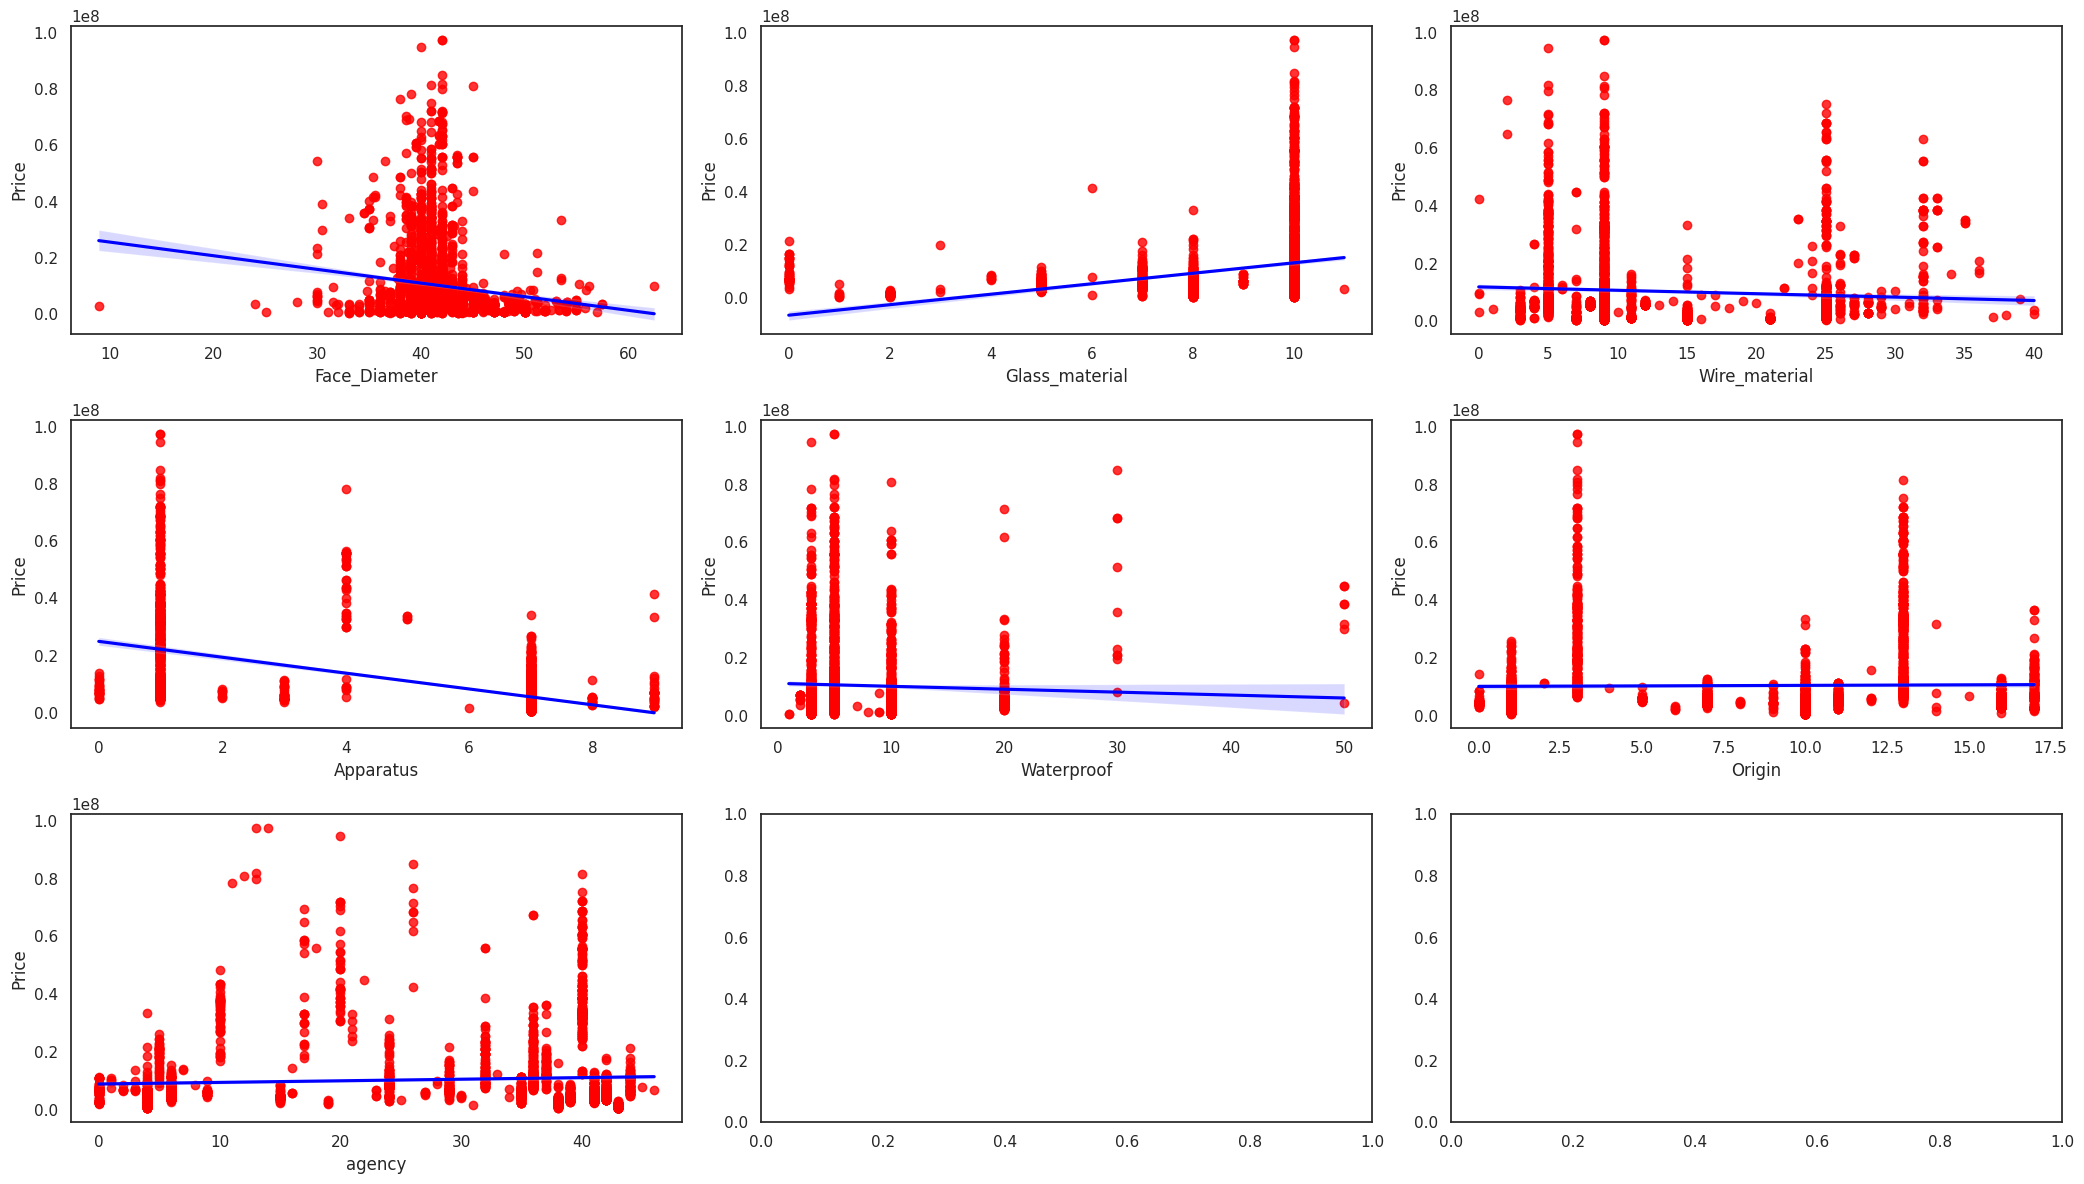

In [380]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(3, 3, figsize=(21,12))

ax1 = plt.subplot(331)
ax1 = sns.regplot(data=data, y='Price', x='Face_Diameter', color='red', line_kws={"color": "blue"})
ax2 = plt.subplot(332)
ax2 = sns.regplot(data=data, y='Price', x='Glass_material', color='red', line_kws={"color": "blue"})
ax3 = plt.subplot(333)
ax3 = sns.regplot(data=data, y='Price', x='Wire_material', color='red', line_kws={"color": "blue"})
ax4 = plt.subplot(334)
ax4 = sns.regplot(data=data, y='Price', x='Apparatus', color='red', line_kws={"color": "blue"})
ax5 = plt.subplot(335)
ax5 = sns.regplot(data=data, y='Price', x='Waterproof', color='red', line_kws={"color": "blue"})
ax6 = plt.subplot(336)
ax6 = sns.regplot(data=data, y='Price', x='Origin', color='red', line_kws={"color": "blue"})
ax7 = plt.subplot(337)
ax7 = sns.regplot(data=data, y='Price', x='agency', color='red', line_kws={"color": "blue"})


plt.tight_layout()

<Axes: >

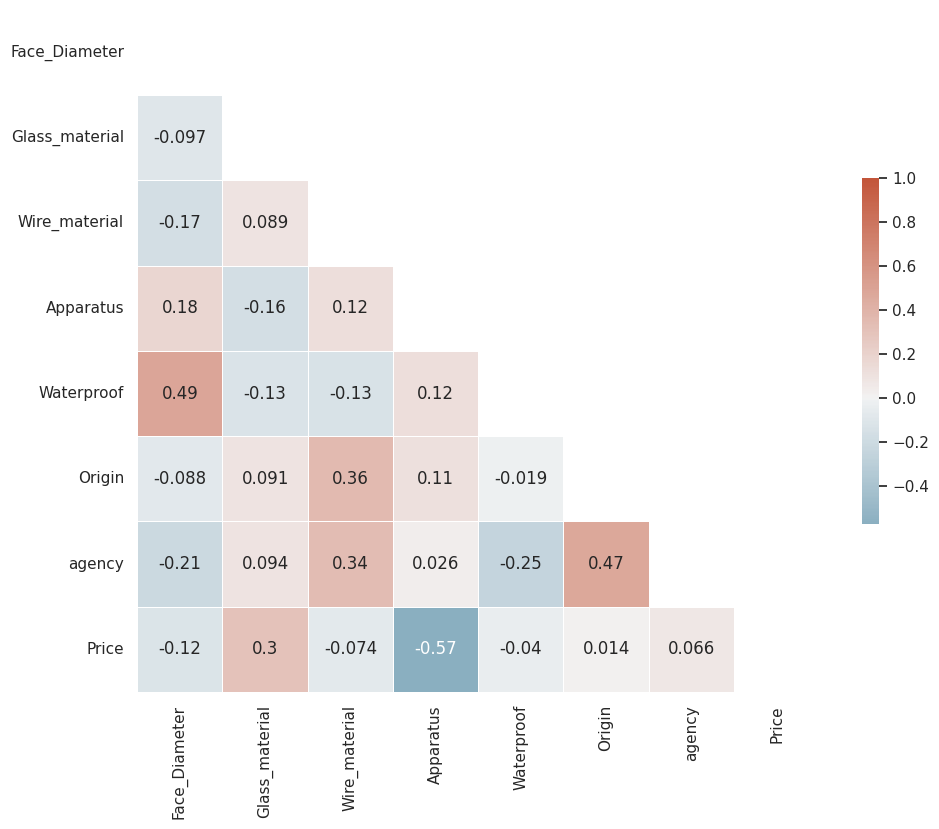

In [381]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Generate a large random dataset


# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = True)

In [382]:
corr = data.corr()
corr['Price'].sort_values(ascending=False)

Price             1.000000
Glass_material    0.301629
agency            0.066253
Origin            0.014072
Waterproof       -0.040212
Wire_material    -0.073716
Face_Diameter    -0.123776
Apparatus        -0.573281
Name: Price, dtype: float64

##**Creating and Modeling using XGBoost Regression**

###Hyperparameter tuning

In [383]:
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]
base_score=[0.25,0.5,0.75,1]

###Define the grid of hyperparameters to search

In [384]:
parameter_grid = {
  'n_estimators': n_estimators,
  'max_depth':max_depth,
  'learning_rate':learning_rate,
  'min_child_weight':min_child_weight,
  'booster':booster,
  'base_score':base_score
}

###Initialize Model and set up the RandomizedSearch

In [385]:
# import xgboost as xgb
# from sklearn.model_selection import RandomizedSearchCV

# regressor = xgb.XGBRegressor()
# random_cv = RandomizedSearchCV(estimator=regressor,
#             param_distributions=parameter_grid,
#             cv=5, n_iter=50,
#             scoring = 'neg_mean_absolute_error',n_jobs = 3,
#             verbose = 5,
#             return_train_score = True,
#             random_state=42)

###Train to find best estrimator

In [386]:
# random_cv.fit(x_train, y_train)

In [387]:
# random_cv.best_estimator_

In [388]:
# random_cv.best_params_

###Initialize Model again with best params

In [389]:
import xgboost as xgb
regressor = xgb.XGBRegressor(base_score=1, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=15, max_leaves=None,
             min_child_weight=1, monotone_constraints=None,
             n_estimators=900, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None)
regressor.fit(x_train,y_train)


XGBRegressor(base_score=1, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=15, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=900, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

###Predict on test data

In [390]:
y_pred_advanced = regressor.predict(x_test)

###Result

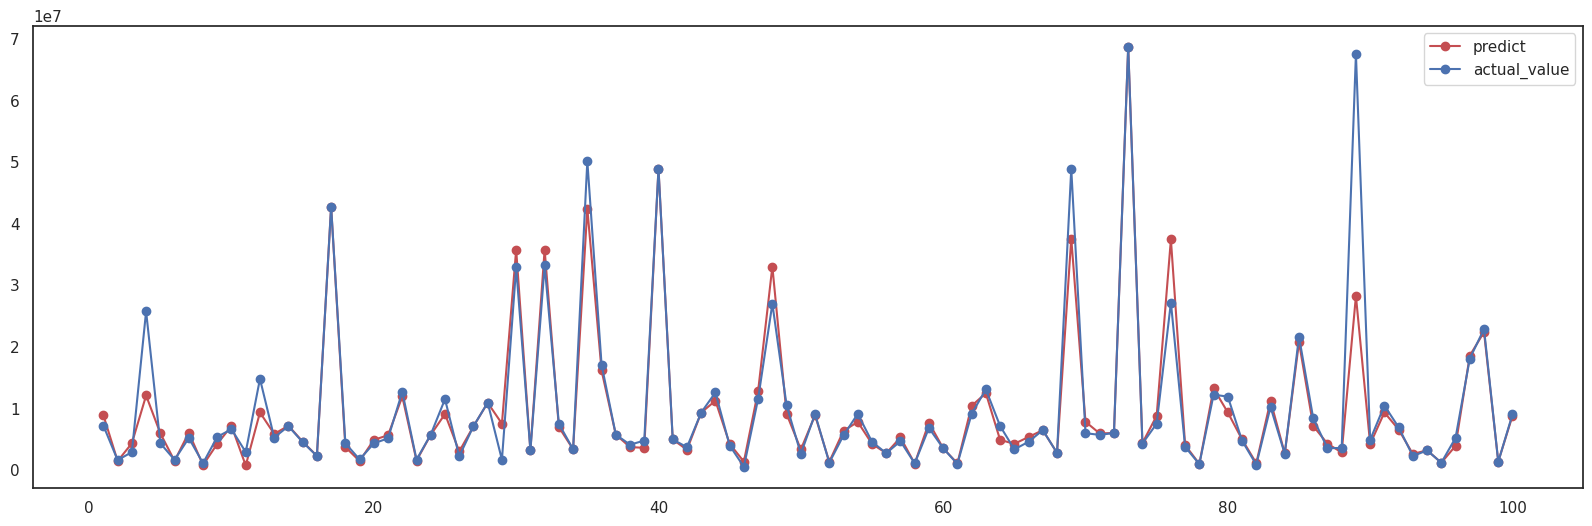

In [391]:
import matplotlib.pyplot as plt

def plot_residuals(y_test, y_pred):
  indexes = list(range(1, len(y_pred)+1))[:100]
  fig, axs = plt.subplots(1, 1, figsize=(20, 6), sharey=True)
  plt.plot(indexes, y_pred[:100],'ro-')
  plt.plot(indexes, y_test[:100],'bo-')
  plt.legend(['predict', 'actual_value'], loc='upper right')
  plt.show()
plot_residuals(y_test, y_pred_advanced)

In [392]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
def accuracy_score(y_test, y_pred, algorithm):
  # r2_score
  R2 = r2_score(y_test, y_pred)
  # RMSE
  rmse = mean_squared_error(y_test, y_pred, squared=False)
  # MAE
  mae = mean_absolute_error(y_test, y_pred)
  # return the results
  return (R2, rmse, mae)
R2_xgboost, rmse_xgboost, mae_xgboost = accuracy_score(y_test, y_pred_advanced, regressor)
print('R2:', R2_xgboost)
print('RMSE:', rmse_xgboost)
print('MAE:', mae_xgboost)

R2: 0.9093421211404343
RMSE: 3767283.733258518
MAE: 1642818.783463756


#**Random Forest Regressor**

In [393]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Tạo mô hình Random Forest với 10 cây quyết định
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

##**Train model**

In [394]:
rf_model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

###**Predict on test data**

In [395]:
y_pred_advanced_randomforest = rf_model.predict(x_test)

##**Result**

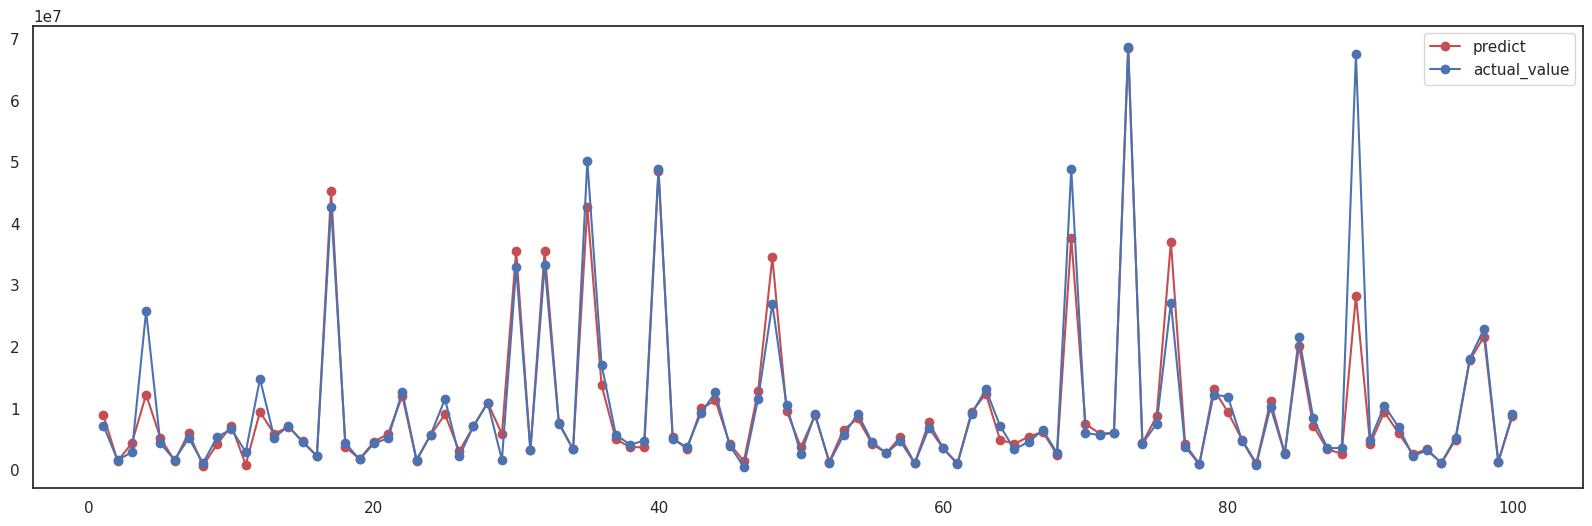

In [396]:
plot_residuals(y_test, y_pred_advanced_randomforest)

In [397]:
R2_rf, rmse_rf, mae_rf = accuracy_score(y_test, y_pred_advanced_randomforest, rf_model)
print("R2 Score:", R2_rf)
print("RMSE:", rmse_rf)
print("MAE:", mae_rf)

R2 Score: 0.8899239066257778
RMSE: 4151184.705136784
MAE: 1719891.8763456596


#**Compare Model**

In [398]:
results = pd.DataFrame(columns=['Algorithm', 'R2', 'RMSE', 'MAE'])
results.loc[1] = ['XGBoost Regression', R2_xgboost, rmse_xgboost, mae_xgboost]
results.loc[2] = ['Random Forest Regressor', R2_rf, rmse_rf, mae_rf]
results.head()

,Algorithm,R2,RMSE,MAE
1,XGBoost Regression,0.909342,3.767284e+06,1.642819e+06
2,Random Forest Regressor,0.889924,4.151185e+06,1.719892e+06


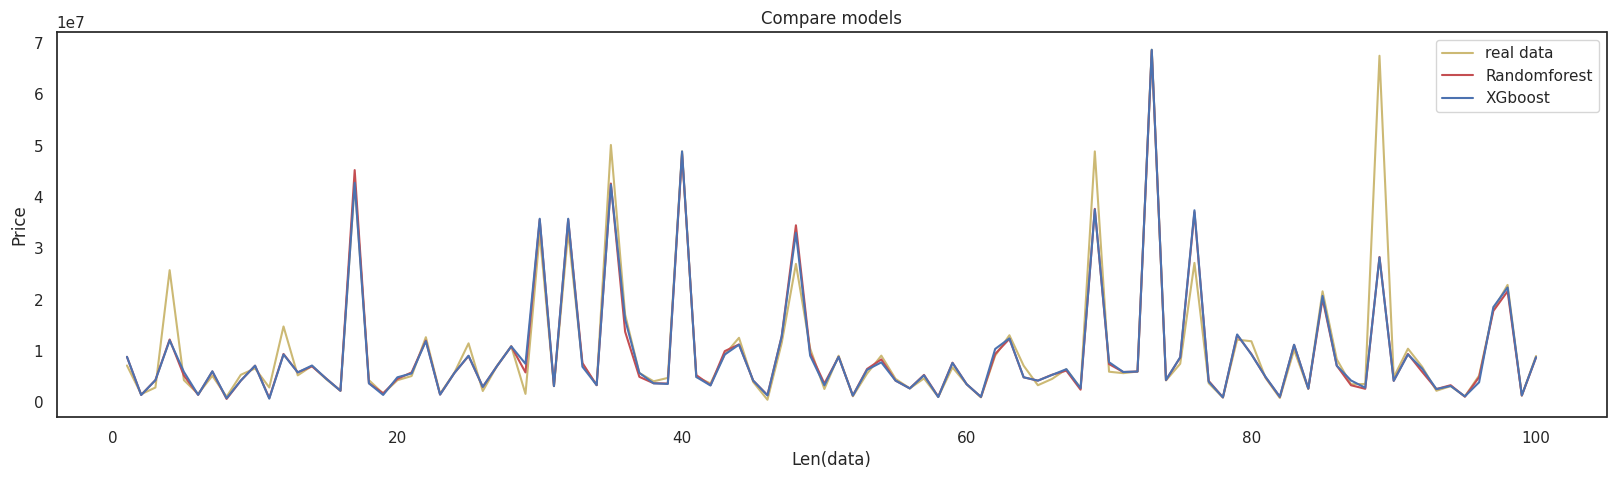

In [399]:
indexes = list(range(1, len(y_pred_advanced)+1))[:100]
plt.figure(figsize=(20,5))
plt.plot(indexes,y_test[:100], 'y-', label='real data')
plt.plot(indexes,y_pred_advanced_randomforest[:100], 'r-', label='Randomforest')
plt.plot(indexes,y_pred_advanced[:100],'b-',label='XGboost')


plt.title('Compare models')
plt.xlabel('Len(data)')
plt.ylabel('Price')
plt.legend(loc='best')
plt.show()